Coordenograma Simples

Creator: Prof. Pedro Henrique Aquino Barra (pedrobarra@ufu.br)

Version: 1.0.1

Gráfico salvo como: coordenograma_de_fase.png


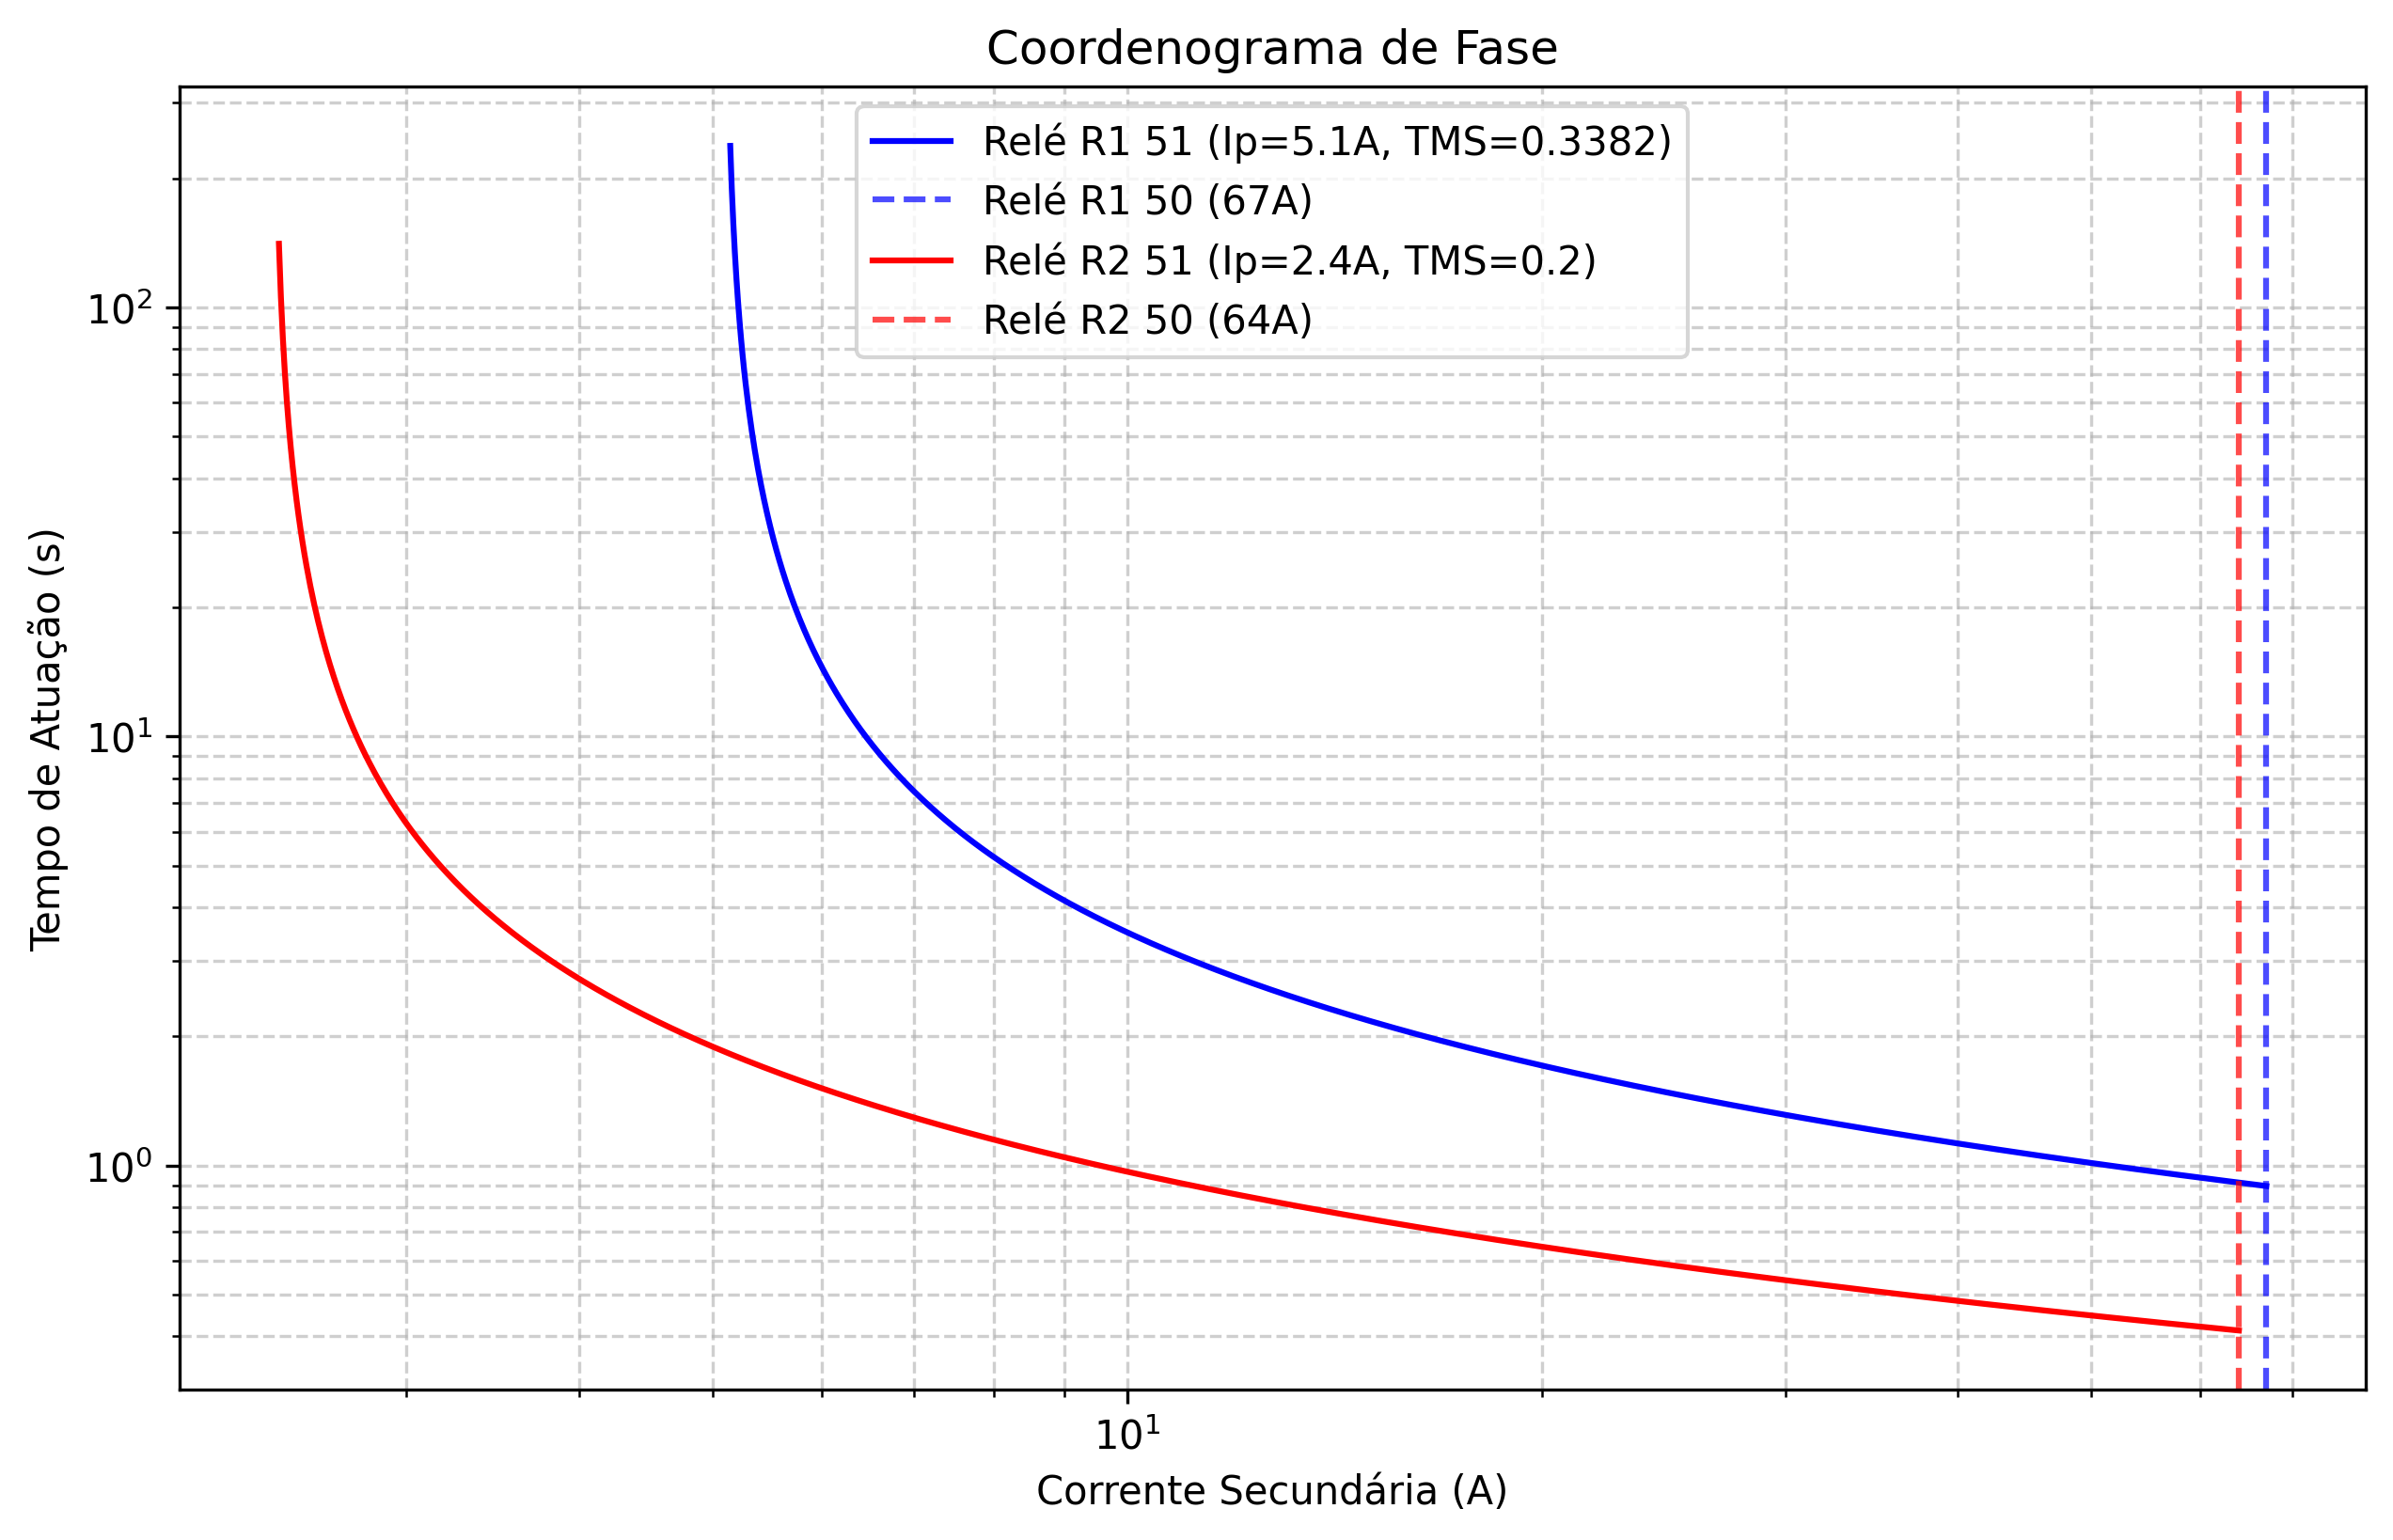

Gráfico salvo como: coordenograma_de_neutro.png


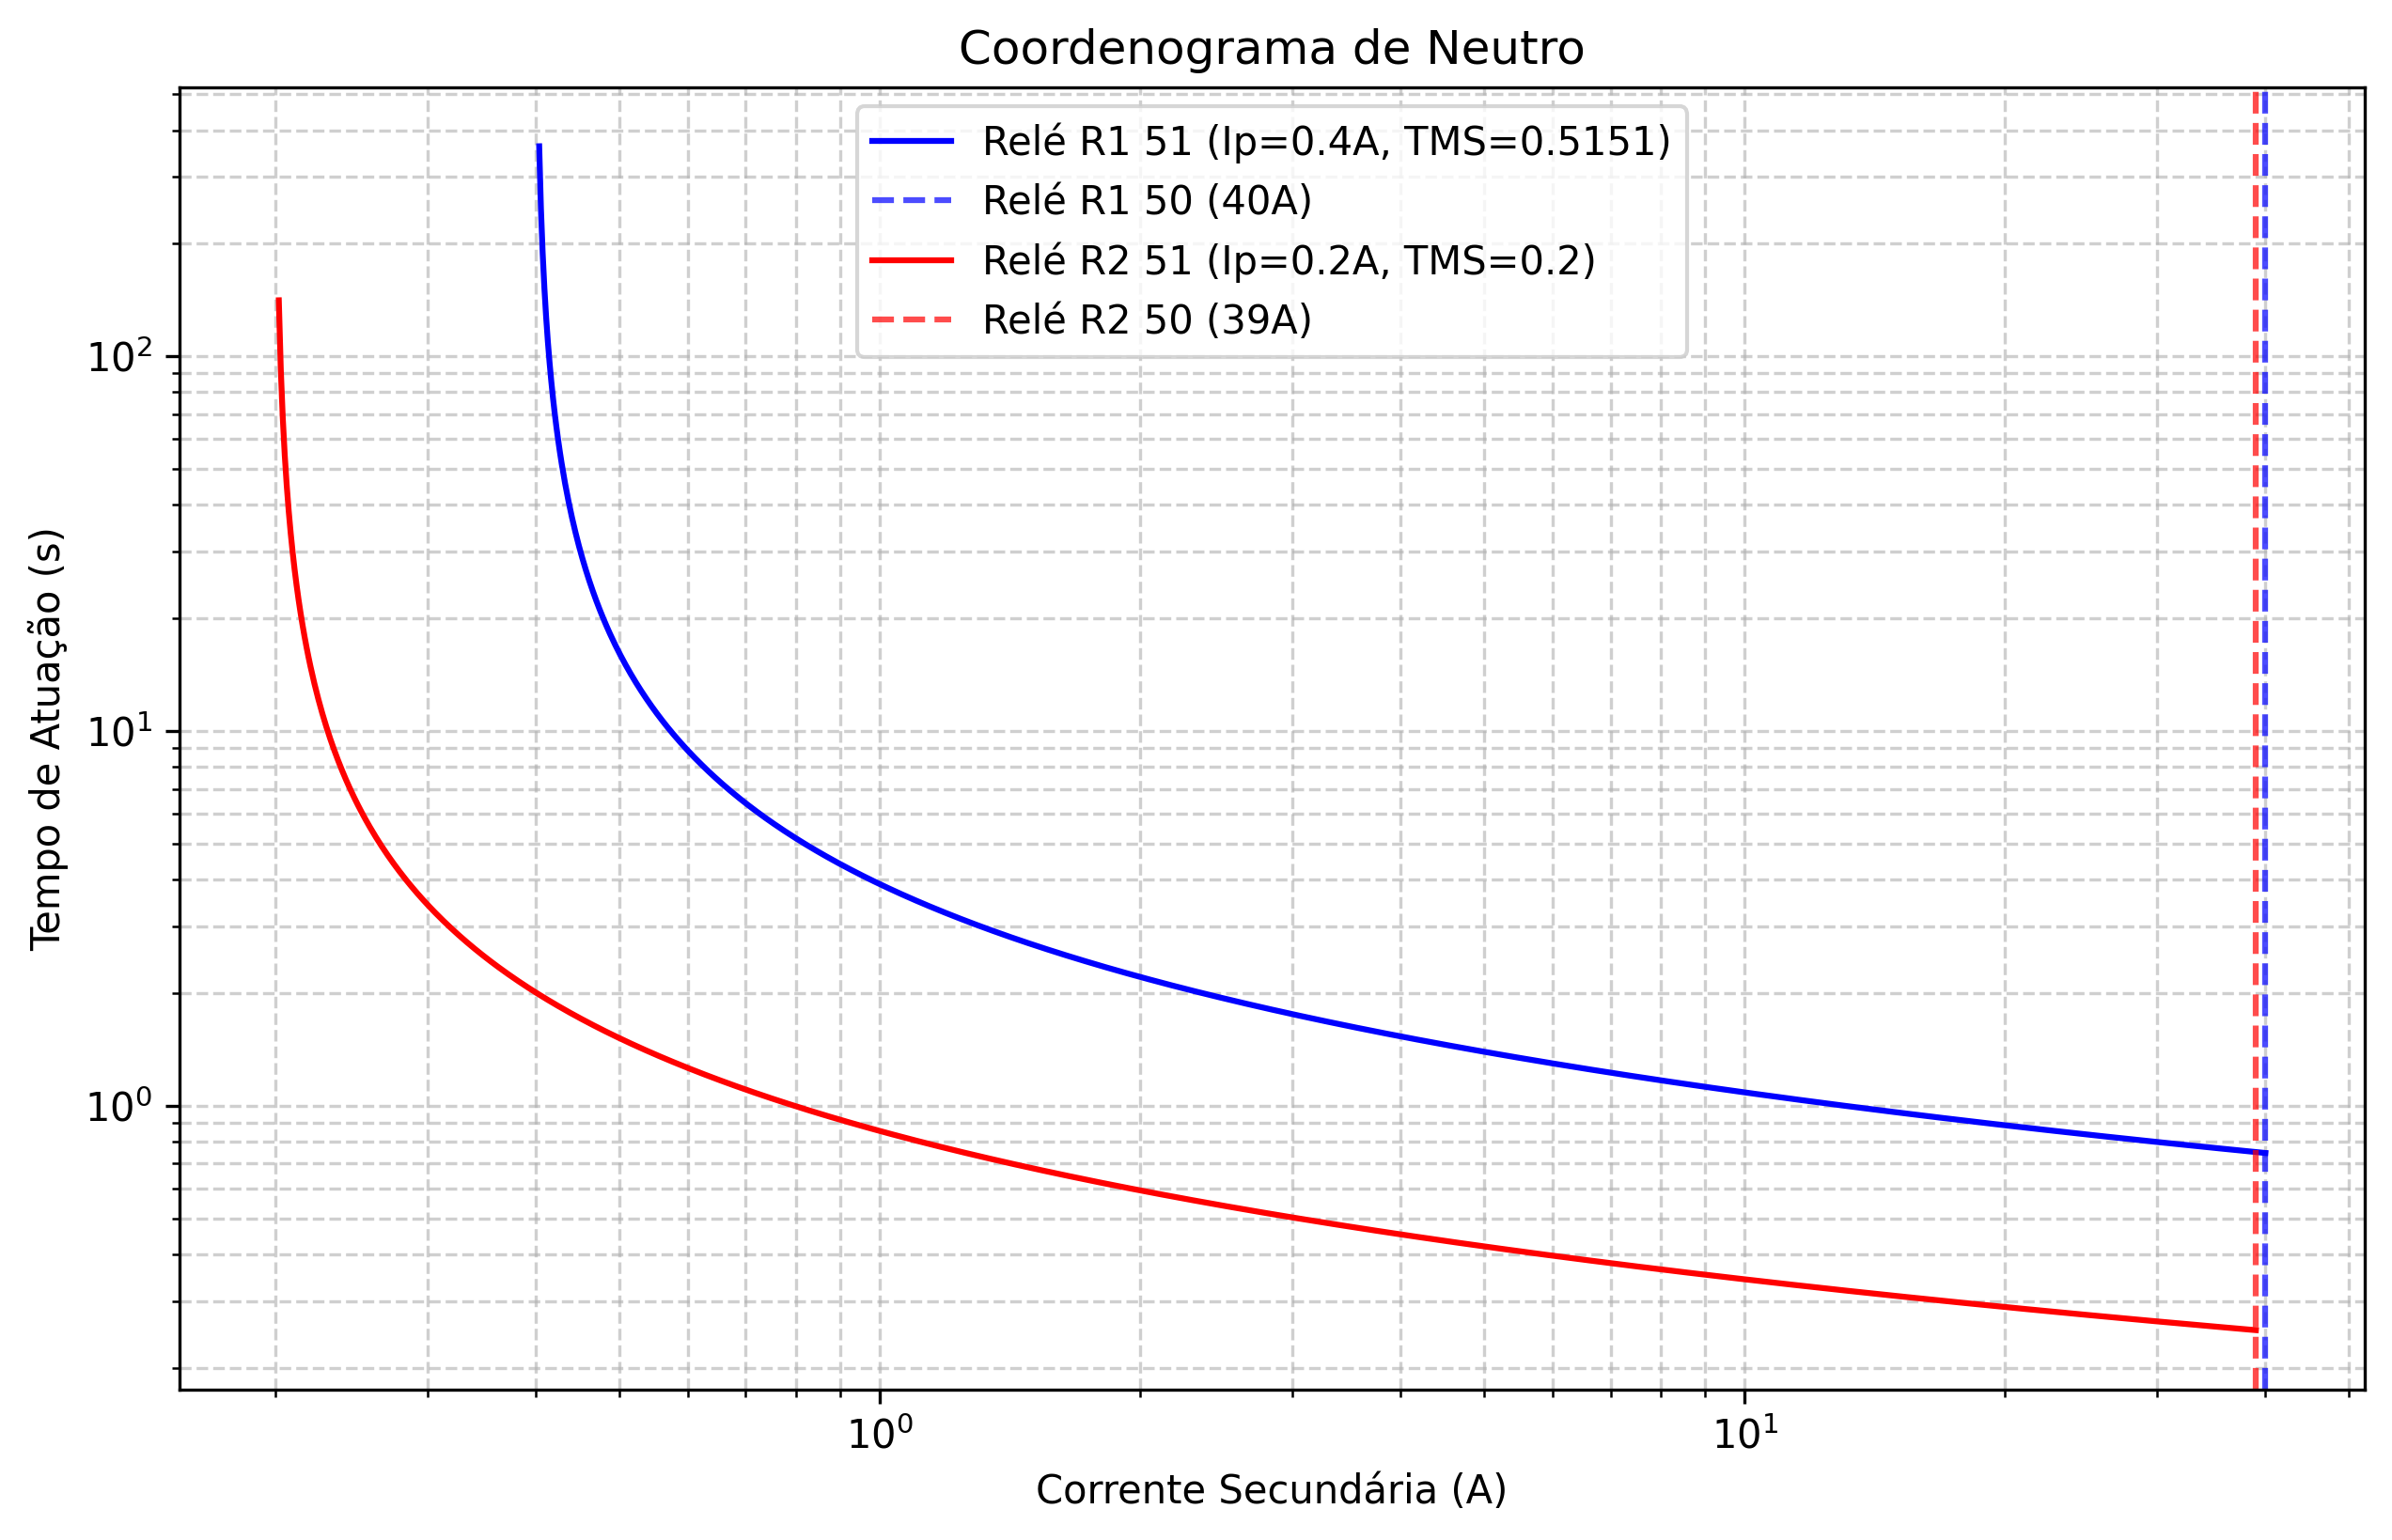

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def iec_curve(time_multiplier, pickup_current, max_current):
    """Calcula a curva IEC Normalmente Inversa"""
    k, alpha = 0.14, 0.02
    current = np.logspace(np.log10(pickup_current * 1.01), np.log10(max_current), 1000)
    trip_time = (k * time_multiplier) / ((current / pickup_current) ** alpha - 1)
    return current, trip_time

def plot_coordenograma(relays, title, save=False):
    """Plota o coordenograma para os relés especificados e salva a imagem se necessário"""
    plt.figure(figsize=(10, 6), dpi=300 if save else 100)
    colors = ['b', 'r']
    
    for i, (name, params) in enumerate(relays.items()):
        current, trip_time = iec_curve(params['TMS'], params['Ip'], params['I50'])
        plt.loglog(current, trip_time, color=colors[i], label=f"{name} 51 (Ip={params['Ip']}A, TMS={params['TMS']})")
        plt.axvline(params['I50'], color=colors[i], linestyle='--', alpha=0.7, label=f"{name} 50 ({params['I50']}A)")
    
    plt.xlabel("Corrente Secundária (A)")
    plt.ylabel("Tempo de Atuação (s)")
    plt.title(title)
    plt.grid(which="both", linestyle="--", alpha=0.6)
    plt.legend()
    
    if save:
        filename = title.replace(" ", "_").lower() + ".png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Gráfico salvo como: {filename}")
    
    plt.show()

# Parâmetros dos relés para fase
relays_fase = {
    "Relé R1": {"Ip": 5.1, "TMS": 0.3382, "I50": 67},
    "Relé R2": {"Ip": 2.4, "TMS": 0.200, "I50": 64}
}

# Parâmetros dos relés para neutro
relays_neutro = {
    "Relé R1": {"Ip": 0.4, "TMS": 0.5151, "I50": 40},
    "Relé R2": {"Ip": 0.2, "TMS": 0.200, "I50": 39}
}

# Gerar e salvar gráficos
plot_coordenograma(relays_fase, "Coordenograma de Fase", save=True)
plot_coordenograma(relays_neutro, "Coordenograma de Neutro", save=True)
